Name : Kava Lakshit <br>
Roll No : 20BCE124<br> 

# Shortest Remaining Time First

In [1]:
import heapq as hq
import numpy as np
import random
import matplotlib.pyplot as plt

In [10]:
def givP(at,t):
    l = []
    for i in at:
        if i[0]==t:
            l.append(i[1])
    return l

def isEnd(remainingTime):
    return sum(remainingTime)==0

def column(matrix, i):
    return [row[i] for row in matrix]

def getCT(at,rt):
    at = [[value,key] for key,value in at.items()] #at, pid
    hq.heapify(at)
    t = 0
    Q = []
    ct={}
    myplot=[]
    hq.heapify(Q)
    #rt,pid
    while True:
        P_at_t = givP(at,t) #gives pid which comes at time t
        for p in P_at_t:
            hq.heappush(Q,[rt[p],p])
        if Q:
            now = hq.heappop(Q) #1st priority
            myplot.append([t,now[1]])
            ct[now[1]] = t+1 #completion time last starting at t and end at t+1
            rt[now[1]] = now[0]-1
            if rt[now[1]]>0:
                hq.heappush(Q,[rt[now[1]],now[1]])
        if isEnd(list(rt.values())):
            break
        t+=1
#     return t,ct,myplot
    return ct,myplot


def Plotit(myplot):
    endTime = myplot[-1][0] +1
    def getColor(n):
        myCol = ['blue','brown','cyan',
         'green','olive',
        'orange','pink','red']
        s = set()
        while(len(s)!=n):
            s.add('tab:'+myCol[random.randint(0,len(myCol)-1)])
        return list(s)
    print("Gant Chart:-")
    fig, gnt = plt.subplots(figsize =(10,5),dpi=300)
    gnt.set_ylim(0, 10)
    gnt.set_xlabel('Sec')
    gnt.set_ylabel('Process')
    gnt.grid(True)

    ax = plt.gca()  # gca stands for 'get current axis'
    ax.spines['right'].set_color('None')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',5))

    My = []
    for i in range(len(at)):
        My.append([])
    for mp in myplot:
        My[mp[1]-1].append((mp[0],1))
    randomColor=getColor(len(My))

    gnt.set_xlim(0,40)
    gnt.set_yticks([5])
    gnt.set_yticklabels(['P'])
    gnt.set_xticks([i for i in range(endTime+2)])

    for i in range(len(My)):
        gnt.broken_barh(My[i], (4, 2), facecolors =(randomColor[i]))

    gnt.legend(['Process #'+str(i) for i in range(1,len(at)+1)],loc='upper left')
#     plt.savefig("MyGantChart.png")
    plt.show()
    
def Print(at,rt,ct):
    process = list(at.keys())
    tat = {}
    wt = {}
    for p in process:
        tat[p] = ct[p] - at[p]
        wt[p] = tat[p] - rt[p]
    print("*"+("-"*18+"*")*6)
    print("|{:^18}|{:^18}|{:^18}|{:^18}|{:^18}|{:^18}|".format("Process","Arrival time","Burst Time","Complete Time","Turn Around Time","Waiting Time"))
    print("*"+("-"*18+"*")*6)
    for p in process:
        print("|{:^18}|{:^18}|{:^18}|{:^18}|{:^18}|{:^18}|".format("Process {}".format(p),at[p],rt[p],ct[p],tat[p],wt[p]))
    print("*"+("-"*18+"*")*6)
    tat_value = tat.values()
    wt_value = wt.values()
    print("Average Turn Around Time is : {}".format(sum(tat_value)/len(tat_value)))
    print("Average Waiting Time is     : {}".format(sum(wt_value)/len(wt_value)))

def solve(at,rt):
    rt_copy = rt.copy()
    ct,myplot=getCT(at,rt)
    # print(ct)
    # print(myplot)
    Plotit(myplot)
    print()
    Print(at,rt_copy,ct)
def userInput():
    n = int(input("Enter Number of Process are Comming :- "))
    at={};rt={};
    for p in range(1,n+1):
        at[p] = int(input("Arrival Time  @{} : ".format(p)))
        rt[p] = int(input("Burst Time    @{} : ".format(p)))
    return at,rt
    

Enter Number of Process are Comming :- 3
Arrival Time  @1 : 0
Burst Time    @1 : 2
Arrival Time  @2 : 1
Burst Time    @2 : 2
Arrival Time  @3 : 2
Burst Time    @3 : 3
Gant Chart:-


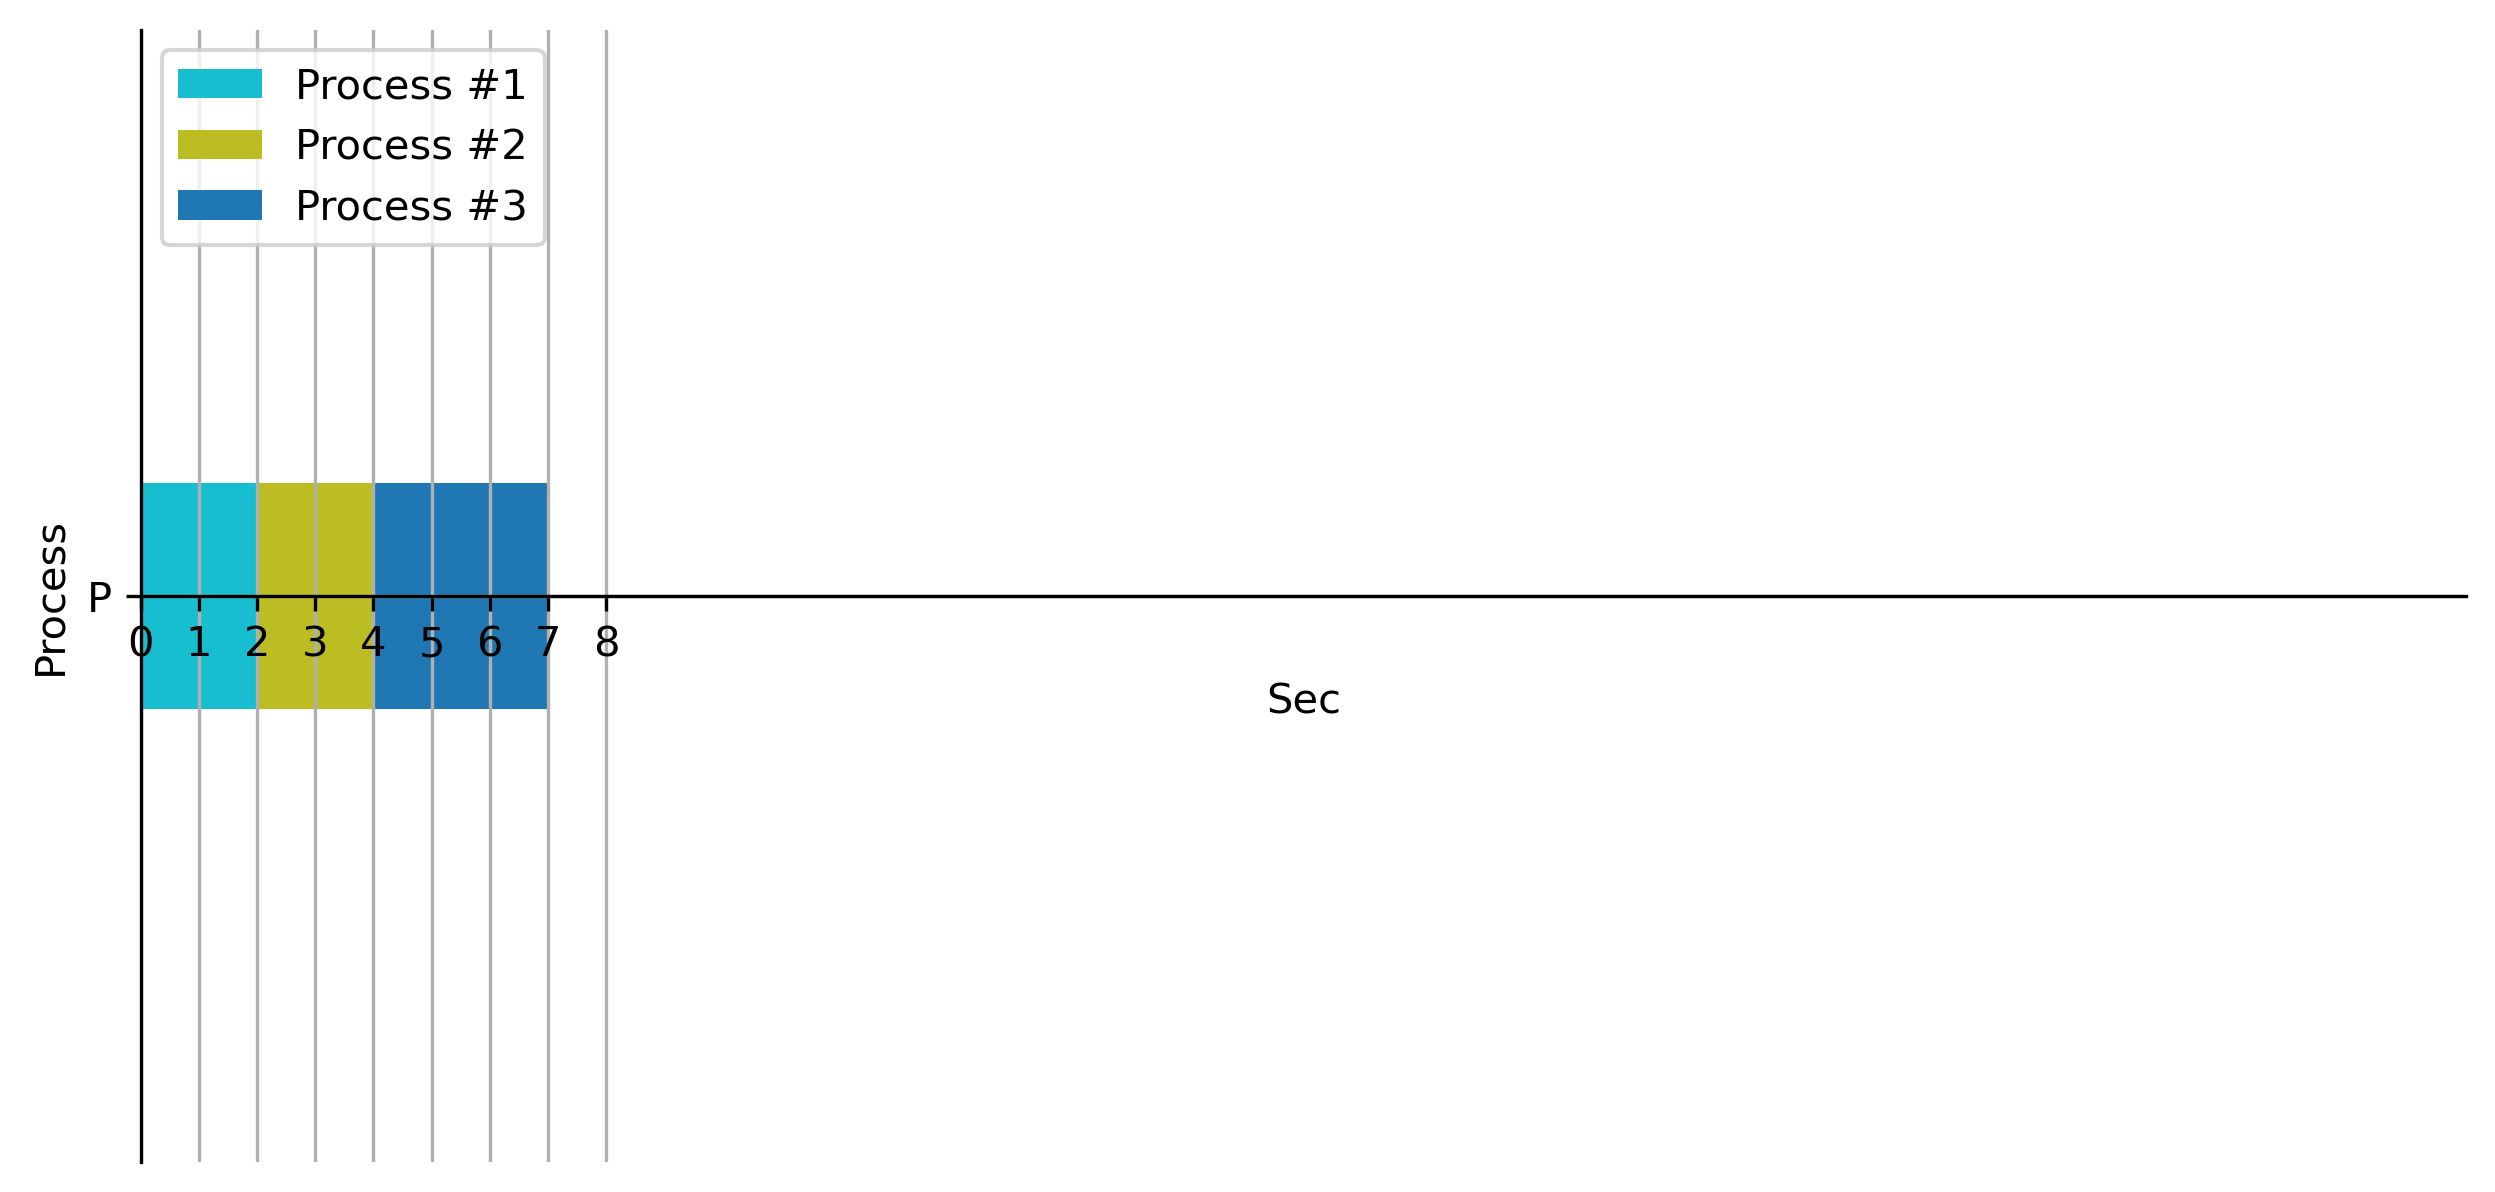


*------------------*------------------*------------------*------------------*------------------*------------------*
|     Process      |   Arrival time   |    Burst Time    |  Complete Time   | Turn Around Time |   Waiting Time   |
*------------------*------------------*------------------*------------------*------------------*------------------*
|    Process 1     |        0         |        2         |        2         |        2         |        0         |
|    Process 2     |        1         |        2         |        4         |        3         |        1         |
|    Process 3     |        2         |        3         |        7         |        5         |        2         |
*------------------*------------------*------------------*------------------*------------------*------------------*
Average Turn Around Time is : 3.3333333333333335
Average Waiting Time is     : 1.0
Gant Chart:-


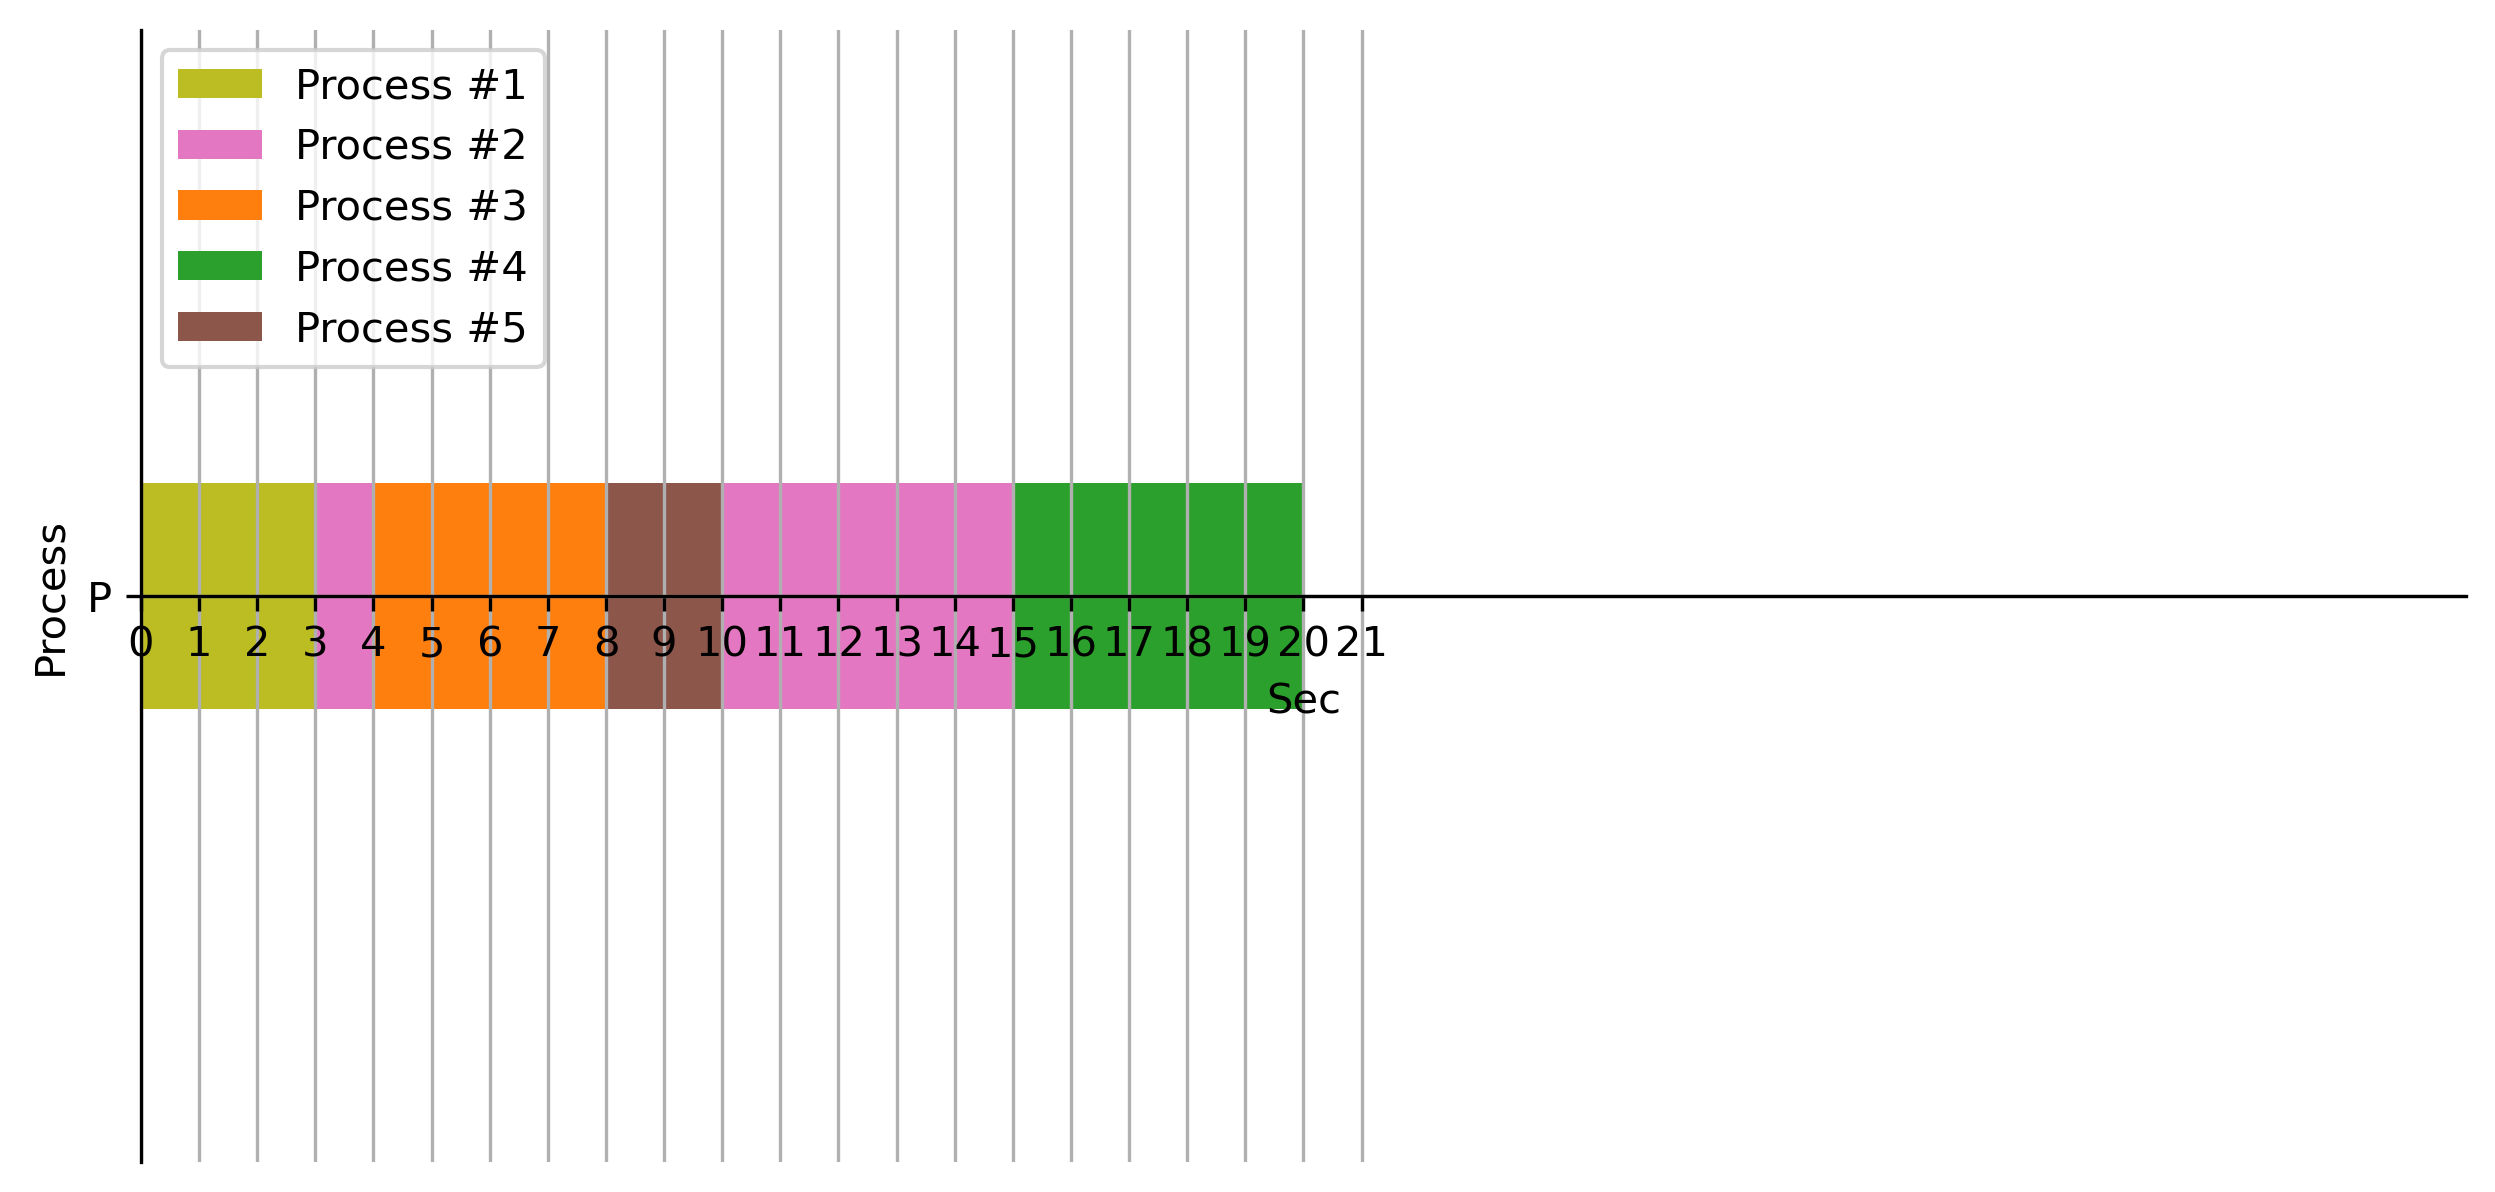


*------------------*------------------*------------------*------------------*------------------*------------------*
|     Process      |   Arrival time   |    Burst Time    |  Complete Time   | Turn Around Time |   Waiting Time   |
*------------------*------------------*------------------*------------------*------------------*------------------*
|    Process 1     |        0         |        3         |        3         |        3         |        0         |
|    Process 2     |        2         |        6         |        15        |        13        |        7         |
|    Process 3     |        4         |        4         |        8         |        4         |        0         |
|    Process 4     |        6         |        5         |        20        |        14        |        9         |
|    Process 5     |        8         |        2         |        10        |        2         |        0         |
*------------------*------------------*------------------*-------------

In [13]:
# Example UserInput

at,rt=userInput()
solve(at,rt)






# Example1
# at = {1:0,2:1,3:2,4:3}
# rt = {1:8,2:4,3:9,4:5}

#solve(at,rt)




#Example2
at = {1:0,2:2,3:4,4:6,5:8}
rt = {1:3,2:6,3:4,4:5,5:2}

solve(at,rt)

In [1]:
#put one object oriented layer and give all the feature to ui based view c















# PageReplacement Algorithm

In [4]:
import numpy as np
import heapq as hq

In [1]:
# page = [1,2,3,4,1,2,5,1,2,3,4,5]

In [14]:
#FIFO,LRU,MRU,optimal
    
def LRU(page,last):
    def ind(i,page,last):
#         global page,last
        Isqn = page[:i][::-1]
        q = []
        #index element
        for j in last:
            q.append([Isqn.index(j),j])
        q.sort()
        return last.index(q[-1][1])
    
    what = []
    final = []
    last=['x' for i in range(size)]
    i=0
    hit=0

    while (i<size):
        last[i]=page[i]
        #final.insert(last)
        final.append(last.copy())
        what.append('*')
        hit += 1
        i += 1
    for p in range(size,len(page)):
        if page[p] in last:
            #final.insert(last)
            final.append(last.copy())
            what.append('-')
        else:
            i = ind(p,page,last)
            last[ind(p,page,last)]=page[p]
            #final.insert(last)
            final.append(last.copy())
            what.append('*')
            hit+=1
    print("-"*(5*len(page) + 1))
    print("|",end="")
    for i in page:
        print("{0:^4}|".format(i),end="")
    print()
    
    print("-"*(5*len(page) + 1))
    for f in range(size):
        print("|",end="")
        for i in range(len(final)):
            print("{:^4}|".format(final[i][f]),end="")
        print()

    print("-"*(5*len(page) + 1))
    print("|",end="")
    
    for i in what:
        print("{:^4}|".format(i),end="")
    print("")

    print("-"*(5*len(page) + 1))
    print("Page fault Happens {} times.".format(hit))

def takeInput():
    print("Enter Sequence space seperated : ",end="")
    page = list(map(int,input().split(" ")))
    size = int(input("Enter Frame size : "))
    return page,size
        

In [15]:

page,size=takeInput()

LRU(page,size)


Enter Sequence space seperated : 7 0 1 2 0 3 0 4 2 3 0 3 2 1 2 0 1 7 0 1
Enter Frame size : 3
-----------------------------------------------------------------------------------------------------
| 7  | 0  | 1  | 2  | 0  | 3  | 0  | 4  | 2  | 3  | 0  | 3  | 2  | 1  | 2  | 0  | 1  | 7  | 0  | 1  |
-----------------------------------------------------------------------------------------------------
| 7  | 7  | 7  | 2  | 2  | 2  | 2  | 4  | 4  | 4  | 0  | 0  | 0  | 1  | 1  | 1  | 1  | 1  | 1  | 1  |
| x  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 3  | 3  | 3  | 3  | 3  | 3  | 0  | 0  | 0  | 0  | 0  |
| x  | x  | 1  | 1  | 1  | 3  | 3  | 3  | 2  | 2  | 2  | 2  | 2  | 2  | 2  | 2  | 2  | 7  | 7  | 7  |
-----------------------------------------------------------------------------------------------------
| *  | *  | *  | *  | -  | *  | -  | *  | *  | *  | *  | -  | -  | *  | -  | *  | -  | *  | -  | -  |
------------------------------------------------------------------------------------------

7 0 1 2 0 3 0 4 2 3 0 3 2 1 2 0 1 7 0 1